# Preliminaries

The `pandas` library allows the user several data structures for different data manipulation tasks:
1. Data storage through its `Series` and `DataFrame` data structures.
2. Data filtering using multiple methods from the package.
3. Reading data from many different file formats such as `csv`, `txt`, `xlsx`, ...

Below we provide a brief overview of the `pandas` functionalities needed for these exercises. The complete documentation can be found on the [`pandas` website](https://pandas.pydata.org/).

## Pandas data structures

### Series
The Pandas Series data structure is similar to a one-dimensional array. It can store any type of data. The values are mutable but the size not.

To create `Series`, we call the `pd.Series()` method and pass an array. A `Series` may also be created from a numpy array.

In [1]:
import pandas as pd
import numpy as np

first_series = pd.Series([1,10,100,1000])

print(first_series)

teams = np.array(['PSV','Ajax','Feyenoord','Twente'])
second_series = pd.Series(teams)

print('\n')
print(second_series)

0       1
1      10
2     100
3    1000
dtype: int64


0          PSV
1         Ajax
2    Feyenoord
3       Twente
dtype: object


### DataFrame
One can think of a `DataFrame` as a table with rows and columns (2D structure). The columns can be of a different type (as opposed to `numpy` arrays) and the size of the `DataFrame` is mutable.

To create `DataFrame`, we call the `pd.DataFrame()` method and we can create it from scratch or we can convert a numpy array or a list into a `DataFrame`.

In [2]:
# DataFrame from scratch
first_dataframe = pd.DataFrame({
    "Position": [1, 2, 3, 4],
    "Team": ['PSV','Ajax','Feyenoord','Twente'],
    "GF": [80, 75, 75, 70],
    "GA": [30, 25, 40, 60],
    "Points": [79, 78, 70, 66]
})

print("From scratch: \n {} \n".format(first_dataframe))

# DataFrme from a list
data = [[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
        [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]]
columns = ["Position", "Team", "GF", "GA", "Points"]

second_dataframe = pd.DataFrame(data, index=columns)

print("From list: \n {} \n".format(second_dataframe.T)) # the '.T' operator is explained later on

# DataFrame from numpy array
data = np.array([[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
                 [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]])
columns = ["Position", "Team", "GF", "GA", "Points"]

third_dataframe = pd.DataFrame(data.T, columns=columns)

print("From numpy array: \n {} \n".format(third_dataframe))

From scratch: 
    Position       Team  GF  GA  Points
0         1        PSV  80  30      79
1         2       Ajax  75  25      78
2         3  Feyenoord  75  40      70
3         4     Twente  70  60      66 

From list: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 

From numpy array: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 



### DataFrame attributes
This section gives a quick overview of some of the `pandas.DataFrame` attributes such as `T`, `index`, `columns`, `iloc`, `loc`, `shape` and `values`.

In [3]:
# transpose the index and columns
print(third_dataframe.T)

            0     1          2       3
Position    1     2          3       4
Team      PSV  Ajax  Feyenoord  Twente
GF         80    75         75      70
GA         30    25         40      60
Points     79    78         70      66


In [4]:
# index makes reference to the row labels
print(third_dataframe.index)

RangeIndex(start=0, stop=4, step=1)


In [5]:
# columns makes reference to the column labels
print(third_dataframe.columns)

Index(['Position', 'Team', 'GF', 'GA', 'Points'], dtype='object')


In [6]:
# iloc allows to access the index by integer-location (e.g. all team names, which are in the second columm)
print(third_dataframe.iloc[:,1])

0          PSV
1         Ajax
2    Feyenoord
3       Twente
Name: Team, dtype: object


In [7]:
# loc allows to access the index by label(s)-location (e.g. all team names, which are in the "Team" columm)
print(third_dataframe.loc[0, 'Team'])

PSV


In [8]:
# shape returns a tuple with the DataFrame dimension, similar to numpy
print(third_dataframe.shape)

(4, 5)


In [9]:
# values return a Numpy representation of the DataFrame data
print(third_dataframe.values)

[['1' 'PSV' '80' '30' '79']
 ['2' 'Ajax' '75' '25' '78']
 ['3' 'Feyenoord' '75' '40' '70']
 ['4' 'Twente' '70' '60' '66']]


### DataFrame methods
This section gives a quick overview of some of the `pandas.DataFrame` methods such as `head`, `describe`, `concat`, `groupby`,`rename`, `filter`, `drop` and `isna`. To import data from CSV or MS Excel files, we can make use of `read_csv` and `read_excel`, respectively.

In [10]:
# print the first few rows in your dataset with head()
print(third_dataframe.head()) # In this case, it is not very useful because we don't have thousands of rows

  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [11]:
# get the summary statistics of the DataFrame with describe()
print(third_dataframe.describe())

       Position    Team  GF  GA Points
count         4       4   4   4      4
unique        4       4   3   4      4
top           4  Twente  75  30     78
freq          1       1   2   1      1


In [12]:
# concatenate (join) DataFrame objects using concat()

# first, we will split the above DataFrame in two different ones
df_a = third_dataframe.loc[[0,1],:]
df_b = third_dataframe.loc[[2,3],:]

print(df_a)
print('\n')

print(df_b)
print('\n')

# now, we concatenate both datasets
df = pd.concat([df_a, df_b])

print(df)

  Position  Team  GF  GA Points
0        1   PSV  80  30     79
1        2  Ajax  75  25     78


  Position       Team  GF  GA Points
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [13]:
# group the data by certain variable via groupby()
# here, we have grouped the data by goals for, which in this case is 75

group = df.groupby('GF')

print(group.get_group('75'))

  Position       Team  GF  GA Points
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70


In [14]:
# rename() helps you change the column or index names
print(df.rename(columns={'Position':'Pos','Team':'Club'}))

  Pos       Club  GF  GA Points
0   1        PSV  80  30     79
1   2       Ajax  75  25     78
2   3  Feyenoord  75  40     70
3   4     Twente  70  60     66


In [15]:
# build a subset of rows or columns of your dataset according to labels via filter()
# here, items refer to the variable names: 'Team' and 'Points'; to select columns, we specify axis=1
print(df.filter(items=['Team', 'Points'], axis=1))

        Team Points
0        PSV     79
1       Ajax     78
2  Feyenoord     70
3     Twente     66


In [16]:
# dropping some labels
print(df.drop(columns=['GF', 'GA']))

  Position       Team Points
0        1        PSV     79
1        2       Ajax     78
2        3  Feyenoord     70
3        4     Twente     66


In [17]:
# search for NA (not available) entries in the DataFrame
print(df.isna()) # No NA values
print('\n')

# create a pandas Series with a NA value
# the Series as W (winnin matches)
tmp = pd.Series([np.NaN, 25, 24, 19],  name="W")

# concatenate the Series with the DataFrame
df = pd.concat([df,tmp], axis = 1)
print(df)
print('\n')

# again, check for NA entries
print(df.isna())

   Position   Team     GF     GA  Points
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False


  Position       Team  GF  GA Points     W
0        1        PSV  80  30     79   NaN
1        2       Ajax  75  25     78  25.0
2        3  Feyenoord  75  40     70  24.0
3        4     Twente  70  60     66  19.0


   Position   Team     GF     GA  Points      W
0     False  False  False  False   False   True
1     False  False  False  False   False  False
2     False  False  False  False   False  False
3     False  False  False  False   False  False


## Dataset

For this week exercises we will use a dataset from the Genomics of Drug Sensitivity in Cancer (GDSC) project (https://www.cancerrxgene.org/). In this study (['Iorio et al., Cell, 2016']()), 265 compounds were tested on 1001 cancer cell lines for which different types of -omics data (RNA expression, DNA methylation, Copy Number Alteration, DNA sequencing) are available. This is a valuable resource to look for biomarkers of drugs sensitivity in order to try to understand why cancer patients responds very differently to cancer drugs and find ways to assign the optimal treatment to each patient.

For this exercise we will use a subset of the data, focusing the response to the drug YM155 (Sepantronium bromide) on four cancer types, for a total of 148 cancer cell lines.

| ID          | Cancer type                      |
|-------------|----------------------------------|
|   COAD/READ | Colorectal adenocarcinoma        |
|   NB        | Neuroblastoma                    |
|   KIRC      | Kidney renal clear cell carcinoma|
|   BRCA      | Breast carcinoma                 |

We will use the RNA expression data (RMA normalised). Only genes with high variability across cell lines (variance > 5, resulting in 238 genes) have been kept.

Drugs have been tested at different concentration, measuring each time the viability of the cells. Drug sensitivity is measured using the natural log of the fitted IC50 metric, which is defined as the half maximal inhibitory concentration. A lower IC50 corresponds to a more sensitive cell line because a lower amount of drug is sufficient to have a strong response, while a higher IC50 corresponds to a more resistant cell line because more drug is needed for killing the cells.

Based on the IC50 metric, cells can be classified as sensitive or resistant. The classification is done by computing the $z$-score across all cell lines in the GDSC for each drug, and considering as sensitive the ones with $z$-score < 0 and resistant the ones with $z$-score > 0.

The dataset is originally provided as 3 files ([original source](https://www.sciencedirect.com/science/article/pii/S0092867416307462?via%3Dihub)) :

`GDSC_RNA_expression.csv`: gene expression matrix with the cell lines in the rows (148) and the genes in the columns (238).

`GDSC_drug_response.csv`: vector with the cell lines response to the drug YM155 in terms of log(IC50) and as classification in sensitive or resistant.

`GDSC_metadata.csv`: metadata for the 148 cell lines including name, COSMIC ID and tumor type (using the classification from ['The Cancer Genome Atlas TCGA'](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga))

For convenience, we provide the data already curated.

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data cam be read as `pandas` `DataFrame`s in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

You can use the `DataFrame`s directly as inputs to the the `sklearn` models. The advantage over using `numpy` arrays is that the variable are annotated, i.e. each input and output has a name.

## Tools
The `scikit-learn` library provides the required tools for linear regression/classification and shrinkage, as well as for logistic regression.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

Note that the notation used for the hyperparameters in the `scikit-learn` library is different from the one used in the lecture. More specifically, in the lecture $\alpha$ is the tunable parameter to select the compromise between Ridge and Lasso. Whereas, `scikit-learn` library refers to `alpha` as the tunable parameter $\lambda$. Please check the documentation for more details.

# Exercises

## Selection of the hyperparameter

Implement cross-validation (using `sklearn.grid_search.GridSearchCV`) to select the `alpha` hyperparameter of `sklearn.linear_model.Lasso`. 

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

X_train,X_test,y_train,y_test=train_test_split(gene_expression,drug_response, test_size=0.2, random_state=42)

param = {'alpha':np.logspace(-4,0,50)}
lasso = Lasso(normalize=True, fit_intercept=True)
grid = GridSearchCV(lasso, param, cv = 5, refit=True)  #find the optimum degree, 5-fold cross-validation
grid.fit(X_train,y_train)
values = grid.cv_results_
model = grid.best_estimator_
best_alpha = grid.best_params_
print("The best alpha =", best_alpha["alpha"])


C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3127432606612852, tolerance: 0.06565973489361702
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4930723743086614, tolerance: 0.06037576212765958
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.81236440402531, tolerance: 0.07080580478723406
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.822499496589862, tolerance: 0.06037576212765958
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1816020847835356, tolerance: 0.07080580478723406
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5738488809440898, tolerance: 0.07451484357894737
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5168291951880928, tolerance: 0.06037576212765958
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8012086338293214, tolerance: 0.07080580478723406
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13559049212815477, tolerance: 0.07451484357894737
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

The best alpha = 0.040949150623804234


C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [6]:
print("The best alpha =", best_alpha["alpha"])

The best alpha = 0.040949150623804234


## Feature selection

Look at the features selected using the hyperparameter which corresponds to the minimum cross-validation error.

<p><font color='#770a0a'>Is the partition in training and validation sets playing a role in the selection of the hyperparameter? How will this affect the selection of the relevant features?</font></p>

In [ ]:
cv = 2 --> a=0.02811768697974228 (7 features)   intercept: -5.65146983 
cv = 3 --> a=0.04941713361323833  (3 features)  intercept: -4.99667904
cv = 4 --> a=0.040949150623804234
cv = 5 --> a=0.033932217718953266 (6 features)  intercept: -5.33457867
cv = 6 --> a=0.04941713361323833
cv = 10--> a=0.02811768697974228
cv = 20--> a=0.02811768697974228 (7 features) intercept: -5.01019

When looking at the data, if the fold of cross-validation (cv) increases, the training set will also increase in size. With this in mind, the validation set will become smaller. This results in the fact that when a higher fold is chosen, the better the estimation of the hyperparameter is. But take into consideration that if the training set will become too big relative to the validation set, the data will get overfitted. On the other hand, when the training set is too small, the data gets underfitted.

In both the cases that the training set is (too) big or (too) small, the hyperparameter alpha is found low (0.028), whereas around cv=5, alpha is approximately 0.04. When a high alpha is used in the Lasso regularization, less features are being used in the model, which are the most relevant ones, therefore a high alpha is favorable.

In conclusion, fold of cross-validation, i.e. partition in training and validation sets, is very important for modelling the data, as a wrong choice of cv may result in underfitting or overfitting. Underfitting and overfitting in this case is noticeable by a low alpha and a high number of features taken into account by the model.


<p><font color='#770a0a'>Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer.</font></p>

Gene expression of an average cancer cell line should give a negative z-score, because it is normal that a cancer cell is sensitive towards a drug and not resistant. 
When a model is fitted on data that is normalized around zero, then the intercept would give the z-score of a zero input. A zero input in this case should give a negative z-score as the average cancer cell line is sensitive to a drug.
This also results from running the code with higher cross-validation folds, when the intercept does not shrink to 0, but to -5.

## Bias-variance 

Show the effect of the regularization on the parameter estimates in terms of bias and variance. For this you can repeat the optimization 100 times using bootstrap and visualise the profile of the Lasso regression coefficient over a grid of the hyperparameter, optionally including the variability as error bars.

<p><font color='#770a0a'>Based on the visual analysis of the plot, what are your observation on bias and variance in relation to model complexity? Motivate your answer.</font></p>


C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1021523526830406, tolerance: 0.10692644338983051
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.382496365131552, tolerance: 0.09504925940677966
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.524055247027605, tolerance: 0.09940931084745762
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3857671368508482, tolerance: 0.10114413694915254
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8282634764667044, tolerance: 0.08685295838983052
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3409900525810838, tolerance: 0.07123761194915253
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4851151258426147, tolerance: 0.07955155016949153
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0566827069656872, tolerance: 0.0911020606779661
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2810102598257276, tolerance: 0.0916133186440678
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0937712401527409, tolerance: 0.09702622822033899
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8306505629833428, tolerance: 0.1021441536440678
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0497278097153622, tolerance: 0.09747358652542373
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3812817887662734, tolerance: 0.09504285398305086
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0502095944227252, tolerance: 0.0908640325423729
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.205069831958753, tolerance: 0.08619789322033898
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.284320152898895, tolerance: 0.0856665386440678
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.455712534195958, tolerance: 0.08933998788135594
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3491529520929064, tolerance: 0.08516543830508475
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3690405412588298, tolerance: 0.08951800584745763
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7219221279662627, tolerance: 0.08445350279661017
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3567672151563723, tolerance: 0.08821457466101695
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7602336198696766, tolerance: 0.08776824338983051
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9192348085472073, tolerance: 0.08747159084745763
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2080086849326563, tolerance: 0.09388793872881356
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5777427956932943, tolerance: 0.08254063194915255
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.427340393796794, tolerance: 0.08598443771186443
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3183901052891567, tolerance: 0.08699936000000001
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7166330749330718, tolerance: 0.0812380159322034
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8473002777056207, tolerance: 0.07595798338983051
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3120537549034974, tolerance: 0.09021291152542373
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.357399361181612, tolerance: 0.08963553016949154
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5760114423568551, tolerance: 0.07520286991525425
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0557818297002624, tolerance: 0.09163972372881356
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7761620733378877, tolerance: 0.07381203830508476
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.639497628951485, tolerance: 0.0893478577118644
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2990737057567732, tolerance: 0.09525400279661017
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0387559498112975, tolerance: 0.08658418957627119
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8383497494964003, tolerance: 0.09935328313559322
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5298531295794158, tolerance: 0.08013658618644068
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3529415000793938, tolerance: 0.07726237194915254
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1801295932566167, tolerance: 0.08777907940677968
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7691090314777251, tolerance: 0.08224519593220339
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7416757533072385, tolerance: 0.08214946372881356
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8871310356841358, tolerance: 0.0751126847457627
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7047025814189602, tolerance: 0.08451681940677966
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4695796420504275, tolerance: 0.07311376754237288
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0481125227062482, tolerance: 0.08706197491525423
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.973421927836031, tolerance: 0.09419612474576272
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4472771605780914, tolerance: 0.08575933491525425
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4208738441529696, tolerance: 0.09238509093220339
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7700251824042352, tolerance: 0.08602805016949154
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3885077295585, tolerance: 0.09030565016949152
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.028356646125408, tolerance: 0.08582231355932204
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.580221508115232, tolerance: 0.084241355
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8156750306187404, tolerance: 0.07847608
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.135937611541703, tolerance: 0.08177832550847458
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9743597819505843, tolerance: 0.07433972618644068
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3388591955935447, tolerance: 0.0940890136440678
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.205245278115144, tolerance: 0.0788650055084746
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9380386477340443, tolerance: 0.07135310991525423
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3131542864912173, tolerance: 0.08396778779661018
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2487861248569, tolerance: 0.07591663254237288
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.236695873608087, tolerance: 0.08001757567796611
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.197743872934272, tolerance: 0.06884093838983052
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.509532633544004, tolerance: 0.07656010788135593
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5985752166513962, tolerance: 0.08658215194915256
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0010428354598493, tolerance: 0.09436980610169492
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1544589230620315, tolerance: 0.06546354618644068
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6013248947874796, tolerance: 0.06499916372881355
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.38119450294099666, tolerance: 0.07720993940677967
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7055706156626708, tolerance: 0.07949665330508474
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.10622585400992, tolerance: 0.10216022313559323
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2235396451860356, tolerance: 0.07794433423728812
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.148438918707553, tolerance: 0.09443467016949153
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15089784123202987, tolerance: 0.0810769725423729
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47955651839335833, tolerance: 0.0689710583898305
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8657467338428761, tolerance: 0.07985850923728814
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.109384386213393, tolerance: 0.09919731288135594
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9601142716083833, tolerance: 0.06928519466101694
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6269365969596623, tolerance: 0.09895561500000001
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6144451993519313, tolerance: 0.09165250313559323
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.76201773155876, tolerance: 0.07764945762711865
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5183743309285036, tolerance: 0.08528953872881355
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8201415422689335, tolerance: 0.08167684788135594
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.967300312211439, tolerance: 0.08964437288135593
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0672729900876488, tolerance: 0.11217551152542374
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8135136923870552, tolerance: 0.08317555771186443
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.720439498601321, tolerance: 0.10638627288135595
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19259620601751792, tolerance: 0.08726061330508475
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5286328484094769, tolerance: 0.08558029830508475
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6166738961935185, tolerance: 0.09443799491525424
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6592719847352058, tolerance: 0.09163248813559322
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5129922992496594, tolerance: 0.08342544313559322
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6796403922002403, tolerance: 0.08293017262711865
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8514645175543292, tolerance: 0.07722887974576273
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.408325141391678, tolerance: 0.06424567593220339
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1301784890693944, tolerance: 0.0668020309322034
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9525977309273048, tolerance: 0.08283905762711864
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20752033653877877, tolerance: 0.08337497118644069
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16662297212690103, tolerance: 0.08476739567796611
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8391195448255329, tolerance: 0.06931807194915254
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4934745360241015, tolerance: 0.09270363152542373
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5907434100386917, tolerance: 0.07628103398305085
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.80911593855698, tolerance: 0.08580901864406781
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.46037614475660105, tolerance: 0.08521269084745763
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47749905026820194, tolerance: 0.08908360618644068
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.372861945173975, tolerance: 0.07080606822033898
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.244055208067528, tolerance: 0.09864683398305085
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.170268241591355, tolerance: 0.09499363830508475
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4697698233549046, tolerance: 0.10100769254237289
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0721487377261933, tolerance: 0.09283746338983051
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17499211203885556, tolerance: 0.08887417838983051
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1577339495242569, tolerance: 0.08253541703389831
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2784877282453131, tolerance: 0.08573072372881356
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4851362257408045, tolerance: 0.08792867016949153
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4399831410422159, tolerance: 0.07523243966101696
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5117192276964602, tolerance: 0.094098613220339
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2614174295547125, tolerance: 0.08285917194915254
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4082448471316944, tolerance: 0.07193831966101695
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3883390405774385, tolerance: 0.09047838271186441
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21200417187171006, tolerance: 0.09455800618644068
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.31747866073207653, tolerance: 0.0692829227118644
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.504529651470353, tolerance: 0.08126842754237289
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8405598057555217, tolerance: 0.0972914833898305
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3349849819664747, tolerance: 0.0791839345762712
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.38237451739781037, tolerance: 0.08751878618644068
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.33655469013127615, tolerance: 0.08336077355932203
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1363019354715398, tolerance: 0.08725029016949153
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1447171948735253, tolerance: 0.08981410855932205
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11498509214797537, tolerance: 0.08487082584745763
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13987341619896831, tolerance: 0.1012212633898305
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11092956603445359, tolerance: 0.0977500145762712
  positive)
C:\Users\Eveline\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

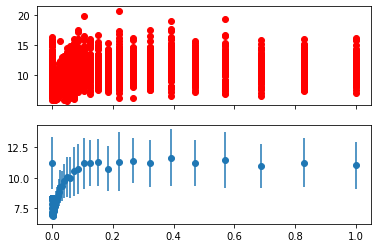

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

X_train,X_test,y_train,y_test=train_test_split(gene_expression,drug_response, test_size=0.2, random_state=42)

alpha = np.logspace(-4,0,50)
total_mse = []
total_mean_mse = []
total_std_mse = []
anumber = 1
for a in alpha:
    boot_mse = []
    for _ in range(100):
        id_pick = np.random.choice(np.shape(X_train)[0], size=X_train.shape[0], replace=True)  
        X_bootsample = X_train.iloc[id_pick,:]
        y_bootsample = y_train.iloc[id_pick,:]
        lasso = Lasso(alpha=a, normalize=True, fit_intercept=True)
        lasso.fit(X_bootsample, y_bootsample)
        y_predict = lasso.predict(X_test)
        y_predict = y_predict[:,np.newaxis]
        y_test2 = y_test['YM155'].astype(float)[:,np.newaxis]
        mse_1 = 1/np.size(y_test)
        mse = (np.sum(np.square(y_test2 - y_predict)))*mse_1
        boot_mse.append(mse)
    mean_mse = np.mean(boot_mse)
    std_mse = np.std(boot_mse)
    total_mse.insert(anumber,boot_mse)
    total_mean_mse.insert(anumber,mean_mse)
    total_std_mse.insert(anumber,std_mse)
    anumber =+ 1


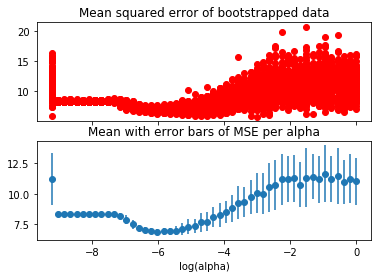

In [9]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)  
ax0.plot(np.log(alpha),total_mse,'ro')
ax0.set_title('Mean squared error of bootstrapped data')
ax1.errorbar(np.log(alpha), total_mean_mse, total_std_mse, linestyle='None', marker='o')
ax1.set_title('Mean with error bars of MSE per alpha')
ax1.set_xlabel('log(alpha)')
plt.show()

Where the mean squared error is lowest, the bias is also the lowest. This is true at around log(alpha) = -6, thus alpha = 10^-6 is the optimum alpha to obtain a minimal bias.
Variance is represented by the error bars and grows as alpha increases from 10^-6.

When alpha is high, the model gets less complex, but variance becomes high. When taking (too) few features into account for the model (low complexity), the features are more likely to be chosen differently for each bootstrapped dataset, because there are actually more features relevant. If, for example, 5 features are responsible for the outcome, then it is likely that for every bootstrapped dataset a different 'top 3' comes out. Therefore, when complexity that is too low, a high variance is found.

When alpha is low, the model is more complex and there is a strong bias. Using (too) many features in the model (high complexity) results in taking features that don't influence the result at all. In this case, the expression of some genes that are not related to the drug response may be used in the prediction. The use of these unrelated features leads to a bias in the prediction of data.

Thus, there is an optimum alpha, where the model has the optimum degree of complexity (number of features), resulting in both bias and variance being the lowest.

## Logistic regression

<p><font color='#770a0a'>Write the expression of the objective function for the penalized logistic regression with $L_1$ and $L_2$ regularisation (as in Elastic net).</font></p>


1/(2*n_samples) * ||y-Xw||^2 + alpha * ( L1_ratio * ||w||^2 +(1 - L1_ratio) * ||w|| )